In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
# Veri işleme ve sayısal işlemler
import numpy as np
import pandas as pd

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

# Makine öğrenmesi
from sklearn.cluster import KMeans

# Uyarıları gizle
import warnings
warnings.filterwarnings("ignore")

# Plotly notebook modu
py.init_notebook_mode(connected=True)

print("Kütüphaneler yüklendi ✅")


Kütüphaneler yüklendi ✅


In [3]:
# Kaggle dataset yolu
data_path = "/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv"

# Veri setini yükleme
df = pd.read_csv(data_path)

# İlk 5 satır
print("İlk 5 satır:")
display(df.head())

# Veri tipleri ve eksik değer kontrolü
print("\nVeri tipleri ve eksik değerler:")
print(df.info())
print("\nEksik veri sayısı sütun bazında:")
print(df.isnull().sum())

# Sayısal özet istatistikler
print("\nSayısal özet istatistikler:")
display(df.describe())


İlk 5 satır:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Veri tipleri ve eksik değerler:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Eksik veri sayısı sütun bazında:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Sayısal özet istatistikler:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 🔍 Veri Seti İncelemesi (EDA) – Çıktı Yorumları

<details>
<summary>1️⃣ Veri Tipleri ve Eksik Değerler</summary>

**Yorum:**

- Toplam **200 müşteri** ve **5 sütun** mevcut.  
- `Gender` dışında tüm değişkenler sayısal.  
- **Eksik veri yok**, bu nedenle veri temiz ve kümeleme için uygundur.

</details>

<details>
<summary>2️⃣ Eksik Veri Kontrolü</summary>

**Yorum:**

- Her sütunda eksik değer **0**, dolayısıyla herhangi bir veri temizleme adımı gerekmez.

</details>

<details>
<summary>3️⃣ Sayısal Özet İstatistikler</summary>

**Yorum:**

- **Yaş**: 18–70 → geniş bir yaş dağılımı var.  
- **Yıllık Gelir**: 15–137 k$ → farklı gelir segmentleri mevcut.  
- **Harcama Skoru**: 1–99 → düşükten yükseğe geniş dağılım.  

**Ortalama değerler müşterilerin tipik profilini gösteriyor:**

- Ortalama yaş: ~39  
- Ortalama gelir: ~61 k$  
- Ortalama harcama skoru: ~50  

💡 **Çıkarım:** Veri, K-Means gibi gözetimsiz öğrenme yöntemleri ile müşteri segmentasyonu yapmak için oldukça uygun. Dağılımın genişliği farklı segmentlerin net bir şekilde ortaya çıkmasını sağlayacaktır.

</details>


In [4]:
# İlk 5 satırı göster
df.head()

# Sütun isimleri
print(df.columns)

# Veri tipleri
print(df.dtypes)

# Satır ve sütun sayısı
print(df.shape)

# Her sütunda eksik veri sayısı
print(df.isnull().sum())

print(df.describe())

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
(200, 5)
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.00

---

<details>
<summary><strong>🔍 Veri Seti İncelemesi (EDA) – Çıktı Yorumları</strong></summary>

### 1️⃣ İlk 5 Satır

* `df.head()` çıktısı bize örnek müşteri verilerini gösteriyor:

```text
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
```

**Yorum:** Veri, `CustomerID`, `Gender`, `Age`, `Annual Income`, `Spending Score` sütunlarından oluşuyor. İlk bakışta mantıklı değerler var.

---

### 2️⃣ Sütun İsimleri

```text
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
```

**Yorum:**

* 5 sütun var, hepsi anlamlı isimlendirilmiş.

---

### 3️⃣ Veri Tipleri

```text
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
```

**Yorum:**

* Sayısal: `CustomerID`, `Age`, `Annual Income`, `Spending Score`
* Kategorik: `Gender`
* Bu tipler K-Means ve görselleştirme için uygun.

---

### 4️⃣ Satır ve Sütun Sayısı

```text
(200, 5)
```

**Yorum:**

* Toplam 200 müşteri, 5 özellik.
* Küçük ve yönetilebilir bir veri seti.

---

### 5️⃣ Eksik Veri Kontrolü

```text
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
```

**Yorum:**

* Hiç eksik veri yok.
* Veri temiz, eksik değer doldurma veya silme gerekmez.

---

### 6️⃣ Temel İstatistikler (Sayısal Değişkenler)

```text
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
```

**Yorum:**

* **Yaş:** 18–70 → geniş yaş dağılımı, farklı müşteri grupları olabilir.
* **Yıllık Gelir:** 15–137 k$ → düşük ve yüksek gelir segmentleri mevcut.
* **Harcama Skoru:** 1–99 → çok çeşitli harcama davranışları var.
* **Ortalama değerler:** Yaş ~39, Gelir ~61 k$, Harcama Skoru ~50 → tipik müşteri profili ortaya çıkıyor.

💡 **Çıkarım:** Veri, K-Means gibi gözetimsiz öğrenme yöntemleri ile müşteri segmentasyonu yapmak için oldukça uygun. Dağılımın genişliği farklı segmentlerin net şekilde ortaya çıkmasını sağlayacaktır.

</details>

---

In [5]:
"""
1️⃣ Veri Ayıklama ve Hazırlama – Plan:
CustomerID K-Means için gereksiz → çıkarılacak.
Gender kategorik, segmentasyona katmak istersek numerik kodlama yapılacak.
Sayısal değişkenler zaten temiz → aykırı değerleri boxplot ile kontrol edeceğiz.
"""
# Gereksiz sütunu çıkarıyoruz
df_clean = df.drop(['CustomerID'], axis=1)

# Gender sütununu sayısala çeviriyoruz (opsiyonel)
df_clean['Gender'] = df_clean['Gender'].map({'Male':0, 'Female':1})

# Hazırlanan veri çerçevesine bir göz atalım
df_clean.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


<details>
<summary><strong>1️⃣ Veri Ayıklama ve Hazırlama – Sonuç Yorumu:</strong></summary>

- CustomerID çıkarıldı, çünkü K-Means için anlamsızdı.
- Gender sayısal hale getirildi (Male=0, Female=1). Artık model bunu kullanabiliriz.
- Age, Annual Income, Spending Score değişkenleri temiz ve sayısal.

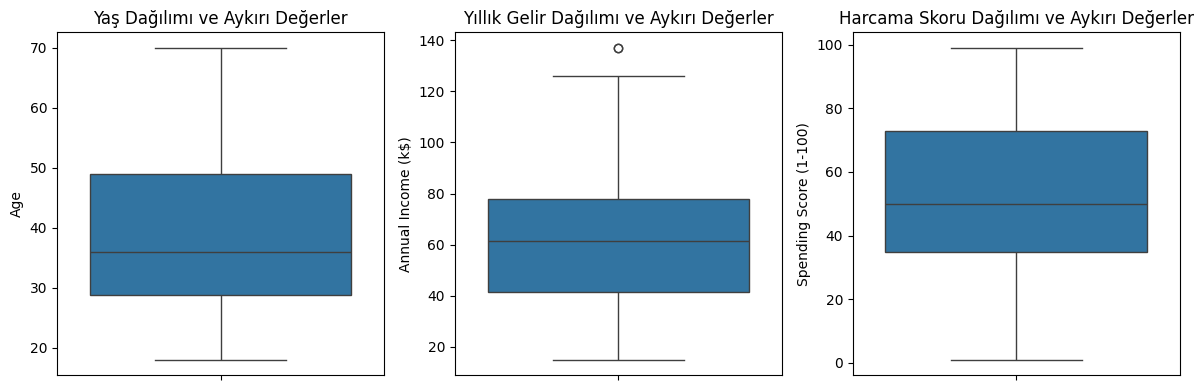

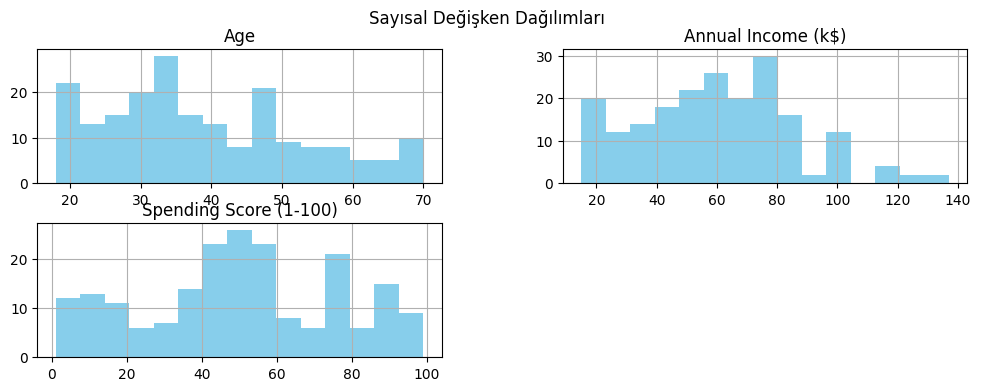

In [6]:
# 📊 Dağılım ve Aykırı Değer Kontrolü

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot: Aykırı değerleri kontrol etmek için
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(y=df_clean['Age'])
plt.title('Yaş Dağılımı ve Aykırı Değerler')

plt.subplot(1,3,2)
sns.boxplot(y=df_clean['Annual Income (k$)'])
plt.title('Yıllık Gelir Dağılımı ve Aykırı Değerler')

plt.subplot(1,3,3)
sns.boxplot(y=df_clean['Spending Score (1-100)'])
plt.title('Harcama Skoru Dağılımı ve Aykırı Değerler')

plt.tight_layout()
plt.show()

# Histogram: Dağılımları görselleştirme
df_clean[['Age','Annual Income (k$)','Spending Score (1-100)']].hist(figsize=(12,4), bins=15, color='skyblue')
plt.suptitle('Sayısal Değişken Dağılımları')
plt.show()

<details>
<summary><strong>📈 2️⃣ Değişkenler Arasındaki İlişkiler (Scatter Plot)</strong></summary>

```python
# Scatter plot: Gelir vs Harcama
plt.figure(figsize=(6,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df_clean, palette=['blue','red'])
plt.title('Yıllık Gelir vs Harcama Skoru')
plt.xlabel('Yıllık Gelir (k$)')
plt.ylabel('Harcama Skoru (1-100)')
plt.show()

# Scatter plot: Yaş vs Harcama
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=df_clean, palette=['blue','red'])
plt.title('Yaş vs Harcama Skoru')
plt.xlabel('Yaş')
plt.ylabel('Harcama Skoru (1-100)')
plt.show()

# Scatter plot: Yaş vs Gelir
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df_clean, palette=['blue','red'])
plt.title('Yaş vs Yıllık Gelir')
plt.xlabel('Yaş')
plt.ylabel('Yıllık Gelir (k$)')
plt.show()
````

**Yorumlar:**

1. **Gelir vs Harcama:**

   * Müşteriler belirgin şekilde birkaç kümeye ayrılıyor.
   * Düşük gelirli ama yüksek harcama yapan az sayıda müşteri var.
   * Yüksek gelir ve yüksek harcama grubu, VIP segmenti olabilir.

2. **Yaş vs Harcama:**

   * Genç müşteriler (18–35) harcama skorunda geniş bir dağılıma sahip.
   * Orta yaş ve yaşlılar genelde daha düşük harcama yapıyor.

3. **Yaş vs Gelir:**

   * Yaş arttıkça gelir de artıyor ama çok yüksek gelirli birkaç kişi var.
   * Bu dağılım K-Means ile segmentleri ayırmak için uygun.

💡 **Çıkarım:** Bu scatter plot’lar, veri setindeki doğal kümeleri ve segmentleri önceden görmemizi sağlıyor. Şimdi K-Means algoritmasını çalıştırıp gerçek segmentleri elde edebiliriz.

</details>